<a href="https://colab.research.google.com/github/ghamawell/silabus-pelatihan-data-Analyst/blob/main/Data_Visualization_with_MATPLOTLIB_dari_elkan_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization with MATPLOTLIB

DQ-LAB DTS KOMINFO DA-Day 6

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

### 1.) Persiapan Visualisai

Untuk melakukan visualisasi perlu dilakukan persiapan data

In [ ]:
#Importing dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [ ]:
#Melakukan pengecekan data yang dibuat sebagai berikut:
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


Sebelum dilakukan **Visualisasi** kita perlu mempersiapkan kolom yang akan digunakan. Contoh apabila dengan data ini kita ingin memvisualisasikan **GMV (Gross Merchendise Value)** (Plot total value masing-masing bulan nya).

Pada kasus ini kita akan memilih menggunakan **Line Chart** dengan GMV akan pada sumbu-y dan bulanan akan di sumbu-x.

In [ ]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

In [ ]:
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


Goal: Plot GMV (y) terhadap Order Month (x)

In [ ]:
# DataFrame aggregate
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()

In [ ]:
monthly_amount.head()

,order_month,gmv
0,2019-07,3524041000
1,2019-08,4452923000
2,2019-09,3947002000
3,2019-10,6719937000
4,2019-11,6182229000


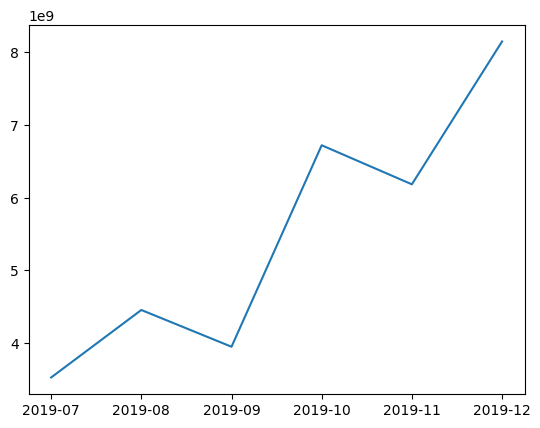

In [ ]:
# Cara 1: Pakai matplotlib object
plt.plot(monthly_amount['order_month'],monthly_amount['gmv'])
plt.show()

In [ ]:
# Cara 2: Direct dari DataFrame


### 2.) Modifikasi Atribut Grafik

Atribut yang menempel pada grafik dapat dimanipulasi. Contoh nya seperti di bawah ini di mana kita akan :
    <ol>
    <li> Mengatur ukuran figur (15,5)
    <li> Title "Monthly GMV Per Month 2019" allignment Center dengan warna font biru
    <li> Label Sumbu X adalah "Order Month" ukuran font 15
    <li> Label Sumbu Y adalah "Total GMV (in Billions)" dengan ukuran font 5
    <li> Untuk grafik menggunakan marker bulat, warna hijau, lebar garis bernilai 2
    <li> Kustomisasi grid  berwarna 'darkgray' , linewidth = 0.5 dan style = ':'
    <li> Tampilan Angka pada sumbu Y dalam Billions (1e9)
    <li> Nilai maksimum Sumbu Y ditampilan adalah 10 Billions dan nilai minimum adalah 0
    <li> Menambahkan Text Anotasi kenaikan  'The GMV increased significantly on October 2019' Pada posisi bulan Oktober
    <li> Melakukan ekspor hasil dalam bentuk .jpg

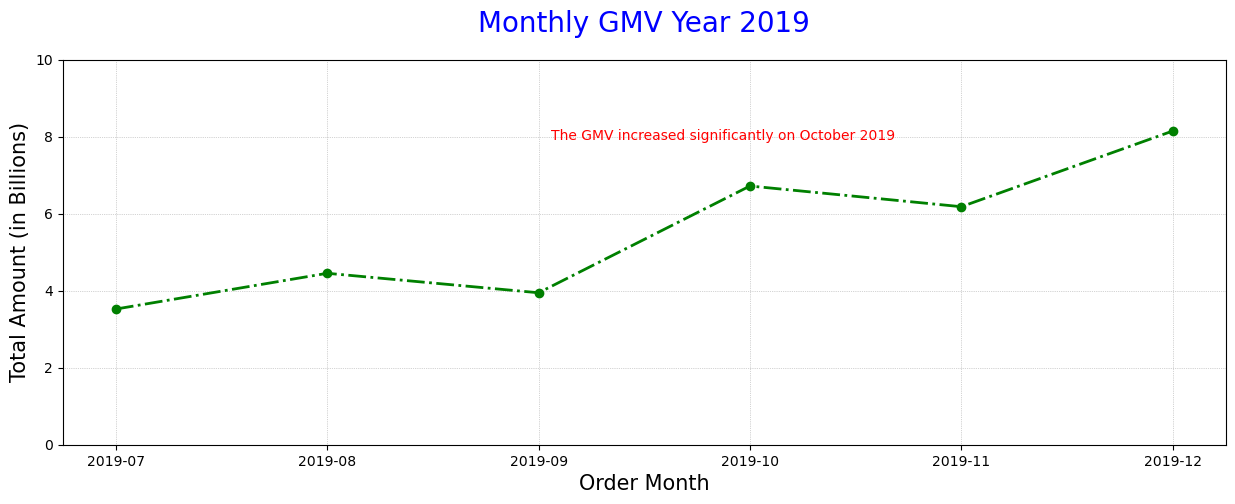

In [ ]:
#Berdasarkan data yang ada untuk memproses semua chart sesuai peruntah maka:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0,ymax = 1e10)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform = fig.transFigure, color = 'red')
plt.show()

In [ ]:
#Untuk Mengeksport Grafik
plt.savefig('monthly_gmv.png')

### 3.) Jenis Visualisasi Lainya

Selain bentuk **Line Chart** terdapat bentuk visualisasi lainnya. Pemilihan jenis visualisasi ini dipengaruhi dengan kebutuhan dari visualisasi tersebut. Pada notebook kali ini akan dibandingkan jenis-jenis visualisasi lainnya seperti:
<ol>
    <li> Multi Line Chart
    <li> Pie Chart
    <li> Bar Chart
    <li> Multi Bar Chart
    <li> Stacked Bar Chart
 </ol>
 
 ## Multi Line Chart

In [ ]:
#Multi Line Chart Bentuk Dataset yang digunakan
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack()

brand,BRAND_A,BRAND_B,BRAND_C,BRAND_H,BRAND_J,BRAND_L,BRAND_P,BRAND_R,BRAND_S,BRAND_W
order_month,,,,,,,,,,
2019-07,326713000,260605000,272511000,89936000,348151000,244413000,394808000,473672000,816882000,296350000
2019-08,357401000,293799000,380110000,160446000,645394000,402161000,618439000,427185000,744362000,423626000
2019-09,258873000,217258000,288637000,168769000,430580000,237654000,530957000,451353000,943807000,419114000
2019-10,548614000,350125000,651095000,396724000,709920000,332522000,740415000,1207866000,1102456000,680200000
2019-11,527527000,571389000,522863000,428063000,307951000,468261000,837394000,748512000,802054000,968215000
2019-12,669029000,401298000,756636000,664723000,798862000,556561000,1008256000,1358124000,1289261000,645485000


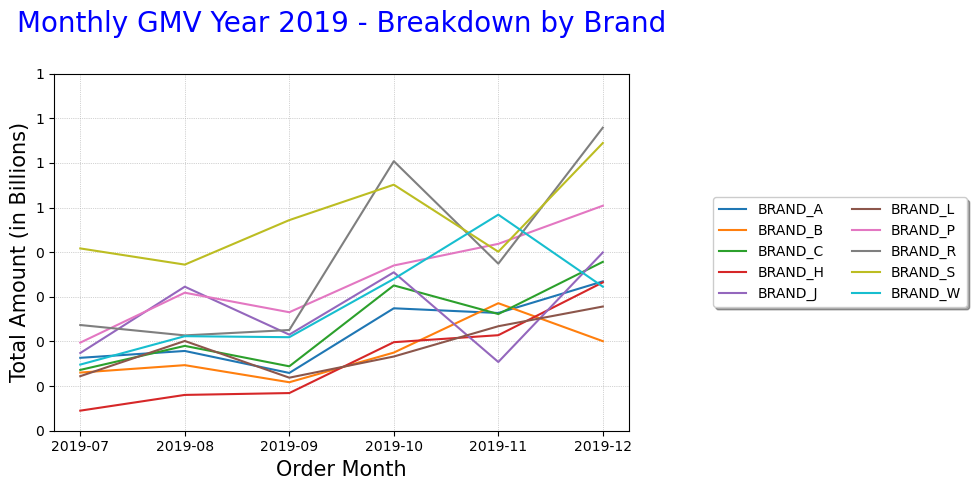

In [ ]:
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc = 'center', pad = 30, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgray',linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1e9).astype(int))
plt.legend(loc = 'right',bbox_to_anchor = (1.6,0.5),shadow = True, ncol = 2)
plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()

## Pie Chart

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.show()

## Bar Chart

Tugas ini dilakukan untuk melihat komposisi kontribusi kota di DKI Jakart untuk Kuartal Q4 2019.

In [ ]:
#Tahap Persiapan Subset dengan code sebagai berikut
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
dataset_dki_q4.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000


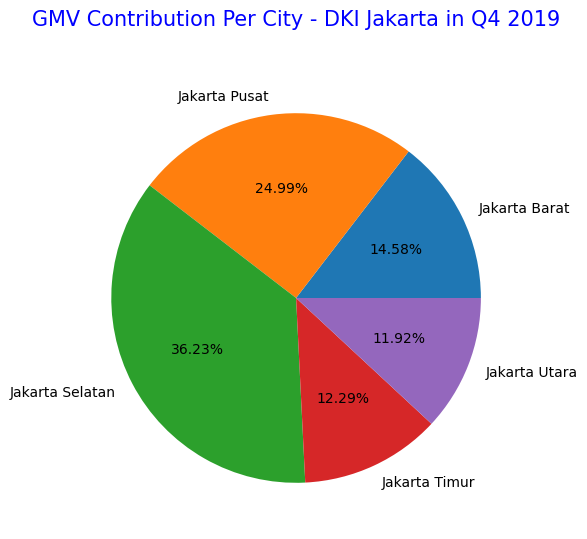

In [ ]:
#Tahapan Untuk Melakukan Plot Bar Chart
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize = (6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct = '%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc = 'center', pad = 30, fontsize = 15, color = 'blue')
plt.show()

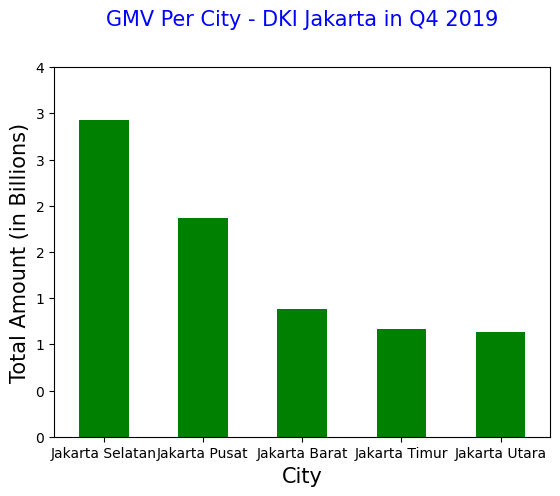

In [ ]:
#Bar Chart berdasarkan hanya GMV saja
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc = 'center', pad = 30, fontsize = 15, color = 'blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.ylim(ymin = 0 )
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1e9).astype(int))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
#Data Set yang perlu disiapkan 
dataset_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack()

order_month,2019-10,2019-11,2019-12
city,,,
Jakarta Barat,375094000,429780000,575091000
Jakarta Pusat,849294000,764062000,751942000
Jakarta Selatan,1462272000,982906000,984432000
Jakarta Timur,348055000,296121000,519470000
Jakarta Utara,237436000,262095000,628562000


<Figure size 640x480 with 0 Axes>

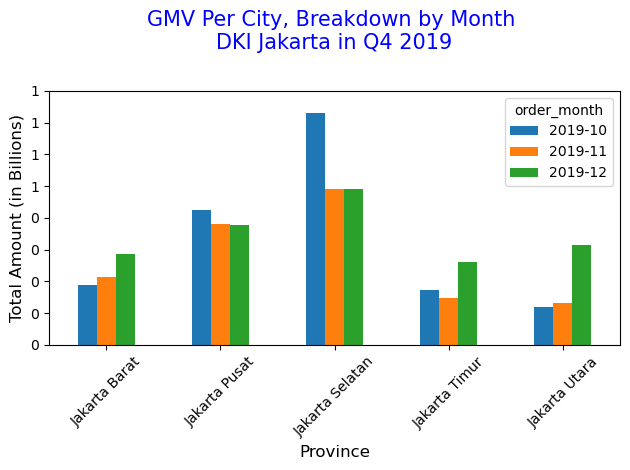

In [ ]:
#Membuat Multi Bar Chart
#Bar Chart berdasarkan hanya GMV saja
plt.clf()
dataset_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind = 'bar')
plt.title('GMV Per City, Breakdown by Month \nDKI Jakarta in Q4 2019', loc = 'center', pad = 30, fontsize = 15, color = 'blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.ylim(ymin = 0 )
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1e9).astype(int))
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

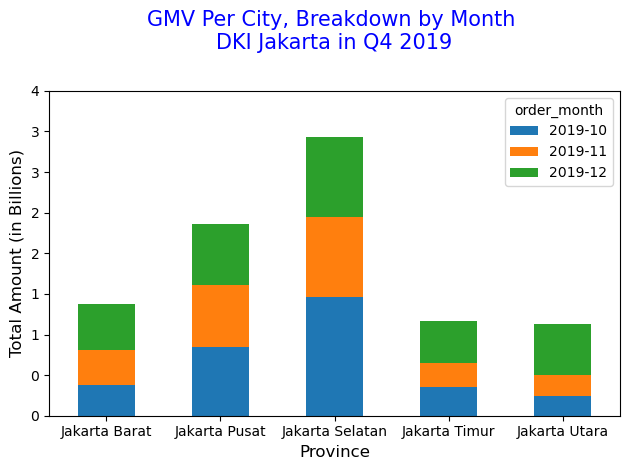

In [ ]:
plt.clf()
dataset_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind = 'bar',stacked = True)
plt.title('GMV Per City, Breakdown by Month \nDKI Jakarta in Q4 2019', loc = 'center', pad = 30, fontsize = 15, color = 'blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.ylim(ymin = 0 )
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1e9).astype(int))
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

## Histogram

<Figure size 640x480 with 0 Axes>

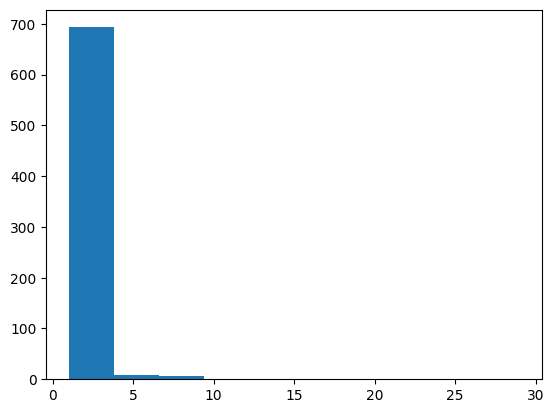

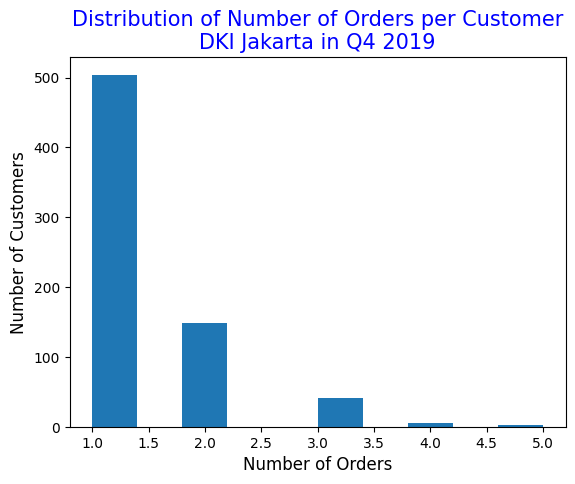

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

## Scatter Plot

<Figure size 640x480 with 0 Axes>

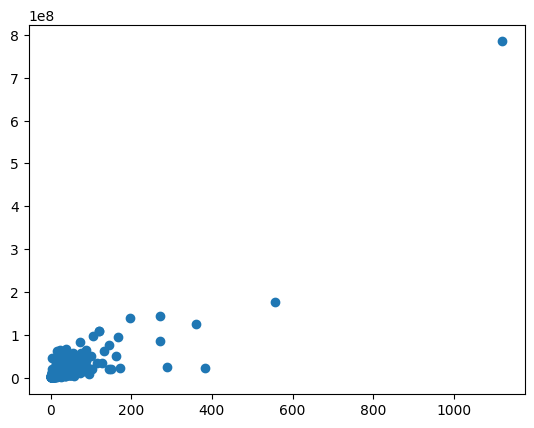

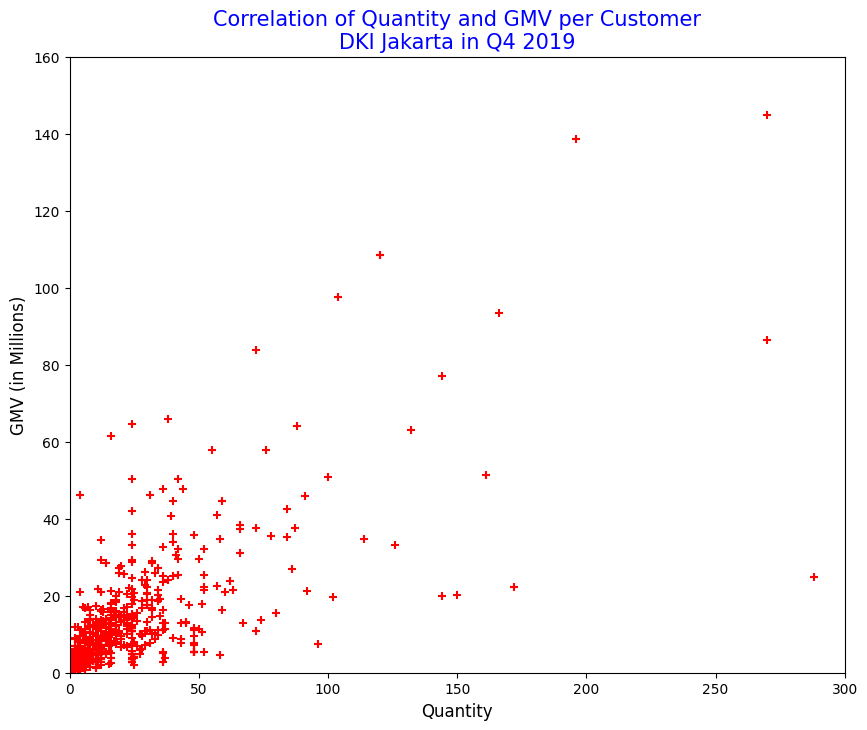

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'],data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()